<a href="https://colab.research.google.com/github/saniyabhosale/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('twitter_training.csv')

# Initial Data Inspection
print("First 5 rows of the dataset:")
print(df.head())

print("\nInformation about the dataset:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands             

--- Data after assigning headers ---
First 5 rows of the dataset:
     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                          Tweet Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          74682 non-null  int64 
 1   Topic       74682 non-null  object
 2   Sentiment   74682 non-null  object
 3   Tweet Text  73996 non-null  object
dtypes: int64(1), o

/tmp/ipython-input-2-1489461835.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis', order=df['Sentiment'].value_counts().index)


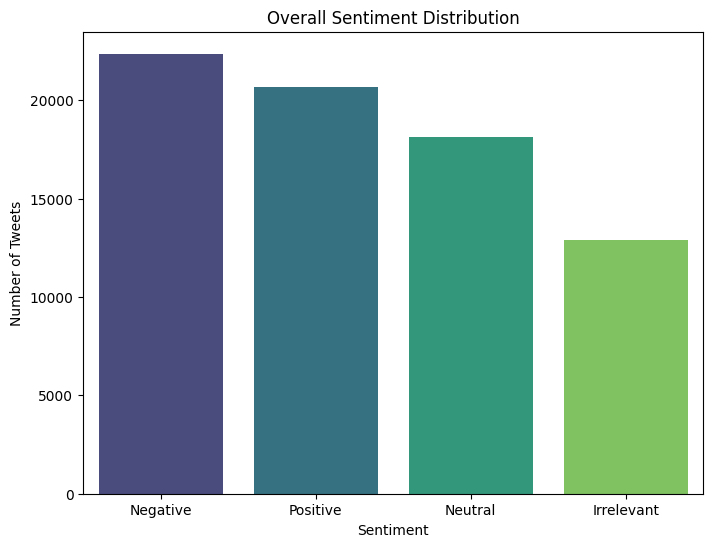


Top 10 topics and their tweet counts:
Index(['LeagueOfLegends', 'MaddenNFL', 'CallOfDuty', 'Verizon',
       'TomClancysRainbowSix', 'Facebook', 'Microsoft', 'Dota2',
       'WorldOfCraft', 'ApexLegends'],
      dtype='object', name='Topic')


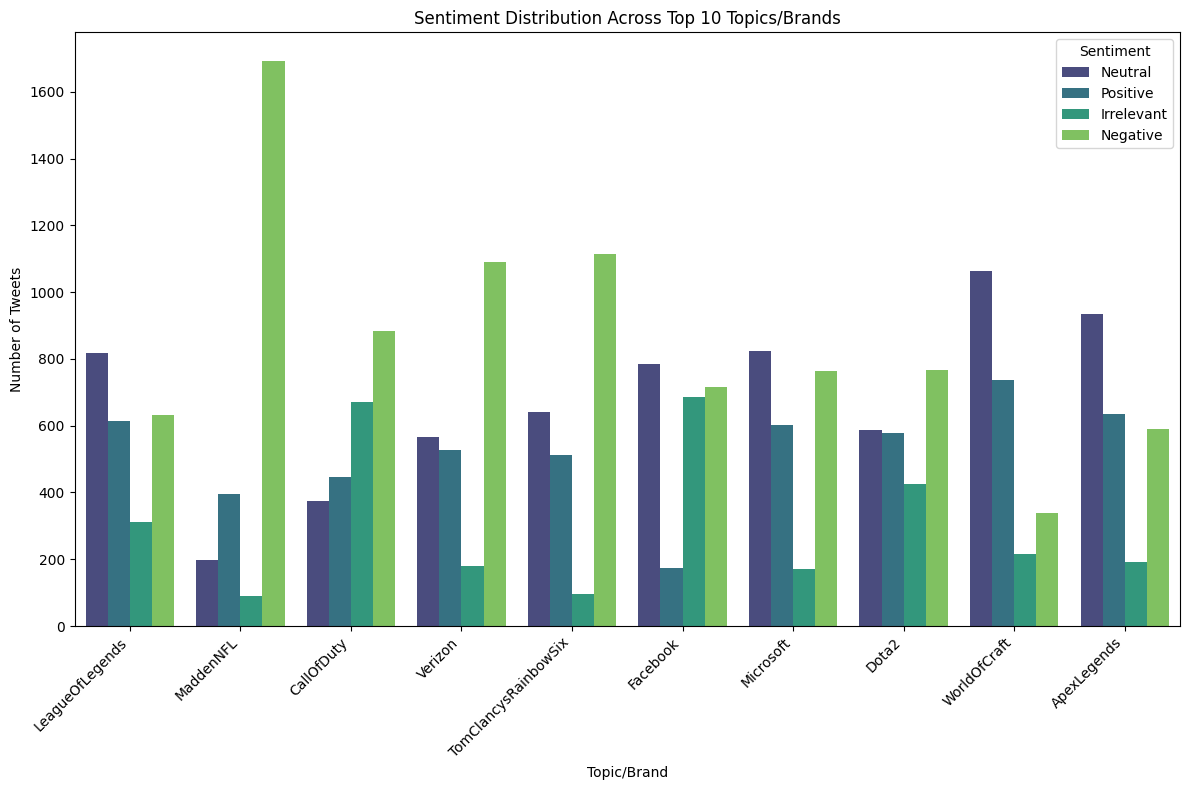

In [2]:
# Reload the dataset with no header and assign column names
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet Text']

print("--- Data after assigning headers ---")
print("First 5 rows of the dataset:")
print(df.head())

print("\nInformation about the dataset:")
print(df.info())

print("\nMissing values in each column before cleaning:")
print(df.isnull().sum())

# Data Cleaning - Handle missing values in 'Tweet Text'
# Drop rows where 'Tweet Text' is NaN, as text is crucial for sentiment analysis
initial_rows = df.shape[0]
df.dropna(subset=['Tweet Text'], inplace=True)
rows_after_dropping = df.shape[0]
print(f"\nDropped {initial_rows - rows_after_dropping} rows with missing 'Tweet Text'.")

print("\nMissing values in each column after cleaning:")
print(df.isnull().sum())

# --- Sentiment Analysis and Visualization ---

# Check the unique values in the 'Sentiment' column
print("\nUnique sentiment labels and their counts:")
print(df['Sentiment'].value_counts())

# Visualize the overall distribution of sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis', order=df['Sentiment'].value_counts().index)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# Visualize sentiment distribution per topic (top N topics for clarity)
print("\nTop 10 topics and their tweet counts:")
top_topics = df['Topic'].value_counts().nlargest(10).index
print(top_topics)

plt.figure(figsize=(12, 8))
sns.countplot(x='Topic', hue='Sentiment', data=df[df['Topic'].isin(top_topics)], palette='viridis', order=top_topics)
plt.title('Sentiment Distribution Across Top 10 Topics/Brands')
plt.xlabel('Topic/Brand')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()